# Desafio de Análise de Dados da Google Play Store

**Objetivo:** Analisar o dataset `googleplaystore.csv` para extrair informações sobre os aplicativos, como categorias mais populares, aplicativos mais caros e distribuição de classificações.

**Bibliotecas utilizadas:**
* **Pandas:** Para manipulação e limpeza dos dados.
* **Matplotlib:** Para a visualização dos dados através de gráficos.

---
### 1. Carregamento dos Dados
Nesta primeira etapa, vamos carregar o dataset a partir do arquivo CSV para um DataFrame do Pandas e fazer uma inspeção inicial.

In [6]:
import pandas as pd

# Carregando o arquivo CSV para um DataFrame
df = pd.read_csv('googleplaystore.csv')

# Exibindo as 5 primeiras linhas para verificar se foi carregado corretamente
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


---
### 2. Limpeza de Dados: Removendo Linhas Duplicadas

Antes de iniciar a análise, é fundamental garantir a qualidade dos dados. Um primeiro passo comum é verificar e remover registros duplicados, para que eles não distorçam as contagens e estatísticas.

In [7]:

# PASSO 1: Remover duplicatas
print("\n1. Removendo linhas duplicadas...")
df.drop_duplicates(inplace=True)
print(f"-> Duplicatas removidas. Novo formato: {df.shape}")

# PASSO 2: Remover a linha com dados inválidos (o método correto e mais simples)
# A gente sabe que o problema era a palavra 'Free' na coluna 'Installs'. Vamos remover essa linha diretamente.
print("\n2. Removendo a linha com 'Free' na coluna 'Installs'...")
df = df[df['Installs'] != 'Free']
print(f"-> Linha inválida removida. Novo formato: {df.shape}")

# PASSO 3: Limpar e converter a coluna 'Installs' para número
print("\n3. Limpando e convertendo a coluna 'Installs'...")
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'])
print("-> Coluna 'Installs' agora é do tipo numérico.")


1. Removendo linhas duplicadas...
-> Duplicatas removidas. Novo formato: (10358, 13)

2. Removendo a linha com 'Free' na coluna 'Installs'...
-> Linha inválida removida. Novo formato: (10357, 13)

3. Limpando e convertendo a coluna 'Installs'...
-> Coluna 'Installs' agora é do tipo numérico.


---
### 3. Análise: Top 5 Apps por Instalação

Nesta seção, vamos identificar os 5 aplicativos com o maior número de instalações. Para isso, precisamos primeiro tratar a coluna 'Installs', que está formatada como texto. Depois, ordenaremos os dados e, finalmente, criaremos um gráfico de barras para visualizar o resultado.

In [8]:
# --- Ordenar e Selecionar o Top 5 ---

print("Ordenando o DataFrame e selecionando os 5 melhores apps...")

# 1. Ordenar o DataFrame pela coluna 'Installs' em ordem decrescente
df_ordenado = df.sort_values(by='Installs', ascending=False)

# 2. Selecionar os 5 primeiros apps deste DataFrame ordenado
top_5_apps = df_ordenado.head(5)

print("Top 5 apps selecionados com sucesso:")
print(top_5_apps[['App', 'Installs']])

Ordenando o DataFrame e selecionando os 5 melhores apps...
Top 5 apps selecionados com sucesso:
                    App    Installs
3454       Google Drive  1000000000
865   Google Play Games  1000000000
3523       Google Drive  1000000000
2544           Facebook  1000000000
2545          Instagram  1000000000


Dados que serão usados para gerar o gráfico:
                    App    Installs
3454       Google Drive  1000000000
865   Google Play Games  1000000000
3523       Google Drive  1000000000
2544           Facebook  1000000000
2545          Instagram  1000000000
----------------------------------------


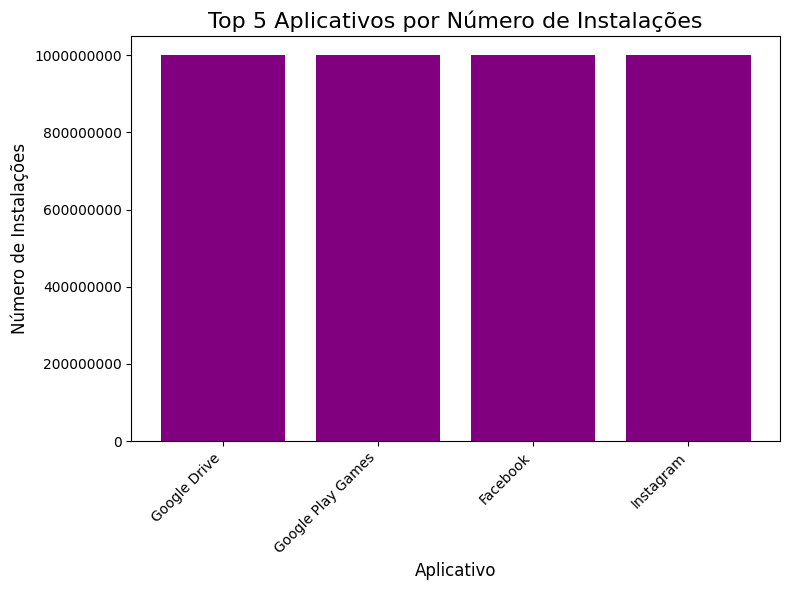

In [28]:
# Importar a biblioteca Matplotlib (garantia, caso não esteja na sessão)
import matplotlib.pyplot as plt

# --- Bloco para gerar o gráfico ---

# Primeiro, vamos verificar se a variável 'top_5_apps' existe e está correta
print("Dados que serão usados para gerar o gráfico:")
print(top_5_apps[['App', 'Installs']])
print("-" * 40) # Uma linha para separar

# Criar a figura e os eixos para o gráfico
plt.figure(figsize=(8, 6))

# Criar o gráfico de barras (mudei a cor para vermos que é o novo código)
plt.bar(top_5_apps['App'], top_5_apps['Installs'], color='purple')

# Adicionar títulos e rótulos para clareza
plt.title('Top 5 Aplicativos por Número de Instalações', fontsize=16)
plt.xlabel('Aplicativo', fontsize=12)
plt.ylabel('Número de Instalações', fontsize=12)

# Melhorar a visualização dos rótulos do eixo X
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y') # Força a não usar notação científica no eixo Y

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()

---
### 4. Análise: Frequência de Categorias de Apps

Nesta etapa, vamos analisar a distribuição dos aplicativos por categoria. O objetivo é criar um gráfico de pizza para visualizar quais são as categorias mais comuns na Google Play Store e qual a sua representatividade no total.

In [10]:
# Contar a frequência de cada categoria usando value_counts()
contagem_categorias = df['Category'].value_counts()

# Para o gráfico não ficar ilegível, vamos pegar as 10 categorias com mais apps
top_10_categorias = contagem_categorias.head(10)

# Somar a contagem de todas as outras categorias
outros = pd.Series([contagem_categorias.iloc[10:].sum()], index=['Outros'])

# Juntar o top 10 com a nova categoria "Outros" para usar no gráfico
categorias_para_grafico = pd.concat([top_10_categorias, outros])


print("\nCategorias preparadas para o gráfico (Top 10 + Outros):")
print(categorias_para_grafico)


Categorias preparadas para o gráfico (Top 10 + Outros):
FAMILY             1943
GAME               1121
TOOLS               843
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     388
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Outros             3721
dtype: int64


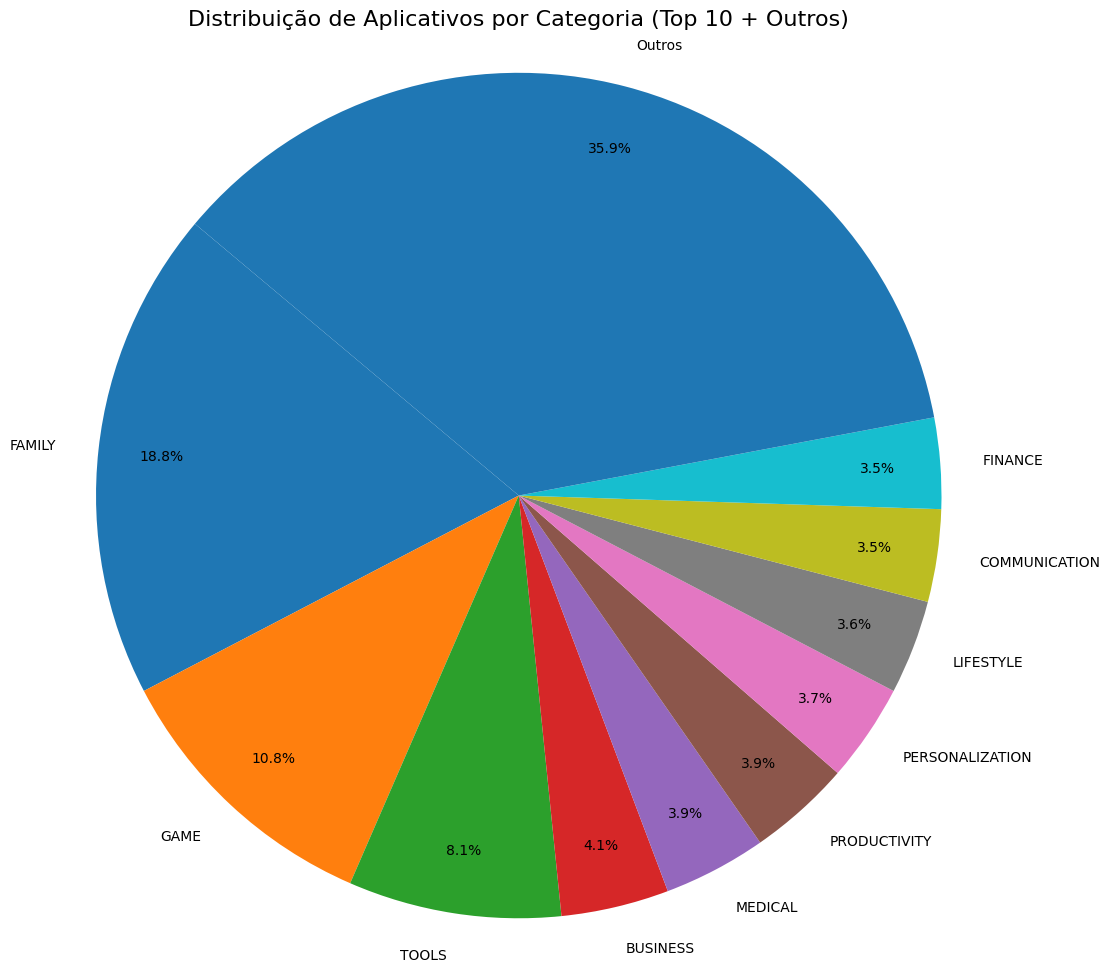

In [22]:
# Gerar o gráfico de pizza
plt.figure(figsize=(12, 12)) # Gráficos de pizza ficam melhores em figuras "quadradas"

# Criar o gráfico
plt.pie(
    categorias_para_grafico,
    labels=categorias_para_grafico.index,
    autopct='%1.1f%%', # Formato para mostrar a porcentagem em cada fatia
    startangle=140,     # Ângulo inicial para a primeira fatia
    pctdistance=0.85    # Distância das porcentagens em relação ao centro
)


fig = plt.gcf()

# Título e ajustes finais
plt.title('Distribuição de Aplicativos por Categoria (Top 10 + Outros)', fontsize=16)
plt.axis('equal')  # Garante que a pizza seja um círculo perfeito.
plt.show()

---
### 5. Análise: Aplicativo Mais Caro

Nesta análise, o objetivo é identificar o aplicativo com o maior preço listado na loja. Isso requer a limpeza da coluna 'Price' para remover símbolos monetários e a conversão para um tipo de dado numérico antes de se determinar o valor máximo.

In [12]:
# A coluna 'Price' contém o cifrão '$'. Vamos removê-lo.
# Primeiro, criamos uma cópia do nosso dataframe limpo para não alterar o original nesta análise pontual.
df_analise_preco = df.copy()

# Remove o '$' e converte a coluna para um tipo numérico (float, para preços com centavos)
df_analise_preco['Price'] = df_analise_preco['Price'].str.replace('$', '', regex=False)
df_analise_preco['Price'] = pd.to_numeric(df_analise_preco['Price'])

print("Tipo de dado da coluna 'Price' após a limpeza:")
print(df_analise_preco['Price'].dtype)

Tipo de dado da coluna 'Price' após a limpeza:
float64


In [13]:
# Encontrar o índice (a posição) da linha que contém o preço máximo
indice_app_mais_caro = df_analise_preco['Price'].idxmax()

# Usar esse índice para buscar a linha inteira com todas as informações do app
app_mais_caro = df_analise_preco.loc[indice_app_mais_caro]

# Exibir as informações de forma organizada
print("--- Aplicativo Mais Caro Encontrado ---")
print(f"Nome: {app_mais_caro['App']}")
print(f"Preço: ${app_mais_caro['Price']:.2f}") # Formata o preço para ter 2 casas decimais
print(f"Categoria: {app_mais_caro['Category']}")
print(f"Número de Instalações: {app_mais_caro['Installs']:,}") # Formata para ter separador de milhar

--- Aplicativo Mais Caro Encontrado ---
Nome: I'm Rich - Trump Edition
Preço: $400.00
Categoria: LIFESTYLE
Número de Instalações: 10,000


---
### 6. Análise: Contagem de Apps "Mature 17+"

O objetivo aqui é quantificar o número de aplicativos destinados a um público adulto, especificamente aqueles com a classificação 'Mature 17+'. Esta é uma contagem simples baseada em uma condição de filtro sobre a coluna 'Content Rating'.

In [14]:
# Vamos primeiro ver todas as classificações de conteúdo que existem
print("Classificações de conteúdo existentes e suas contagens:")
print(df['Content Rating'].value_counts())

Classificações de conteúdo existentes e suas contagens:
Content Rating
Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64


In [15]:
# Criar uma condição booleana: True para linhas onde 'Content Rating' é 'Mature 17+', False caso contrário
condicao_maduro = df['Content Rating'] == 'Mature 17+'

# A soma de uma série booleana conta todos os 'True' (pois True=1 e False=0)
quantidade_apps_maduros = condicao_maduro.sum()


print("\n--- Resultado da Contagem ---")
print(f"O número de aplicativos classificados como 'Mature 17+' é: {quantidade_apps_maduros}")


--- Resultado da Contagem ---
O número de aplicativos classificados como 'Mature 17+' é: 447


---
### 7. Análise: Top 10 Aplicativos por Número de Reviews

O objetivo é identificar os 10 aplicativos que receberam a maior quantidade de avaliações (reviews) dos usuários. A tarefa consiste em ordenar o dataset com base na coluna 'Reviews' em ordem decrescente e selecionar os 10 primeiros registros para exibição.

In [16]:
# PASSO 1: Verificar e garantir que a coluna 'Reviews' é numérica
# É uma boa prática garantir o tipo do dado antes de fazer operações numéricas.
df['Reviews'] = pd.to_numeric(df['Reviews'])

# PASSO 2: Ordenar o DataFrame pela coluna 'Reviews' em ordem decrescente
df_por_reviews = df.sort_values(by='Reviews', ascending=False)

# PASSO 3: Selecionar os 10 primeiros registros do DataFrame ordenado
top_10_reviews = df_por_reviews.head(10)

# PASSO 4: Exibir o resultado de forma clara
print("--- Top 10 Aplicativos por Número de Reviews ---")
print(top_10_reviews[['App', 'Reviews', 'Category']]) # Adicionei a categoria por curiosidade

--- Top 10 Aplicativos por Número de Reviews ---
                                           App   Reviews       Category
2544                                  Facebook  78158306         SOCIAL
3943                                  Facebook  78128208         SOCIAL
336                         WhatsApp Messenger  69119316  COMMUNICATION
3904                        WhatsApp Messenger  69109672  COMMUNICATION
2604                                 Instagram  66577446         SOCIAL
2545                                 Instagram  66577313         SOCIAL
3909                                 Instagram  66509917         SOCIAL
382   Messenger – Text and Video Chat for Free  56646578  COMMUNICATION
335   Messenger – Text and Video Chat for Free  56642847  COMMUNICATION
1879                            Clash of Clans  44893888           GAME


---
### 8. Análises e Gráficos Adicionais (Tarefas 7 e 8)

Para finalizar o desafio, esta seção apresenta duas novas análises sobre o dataset, cada uma acompanhada de uma forma gráfica de visualização não utilizada anteriormente.

--- Cálculo 1: Média Geral de Notas ---
A média de nota (rating) de todos os aplicativos é: 4.19

--- Gráfico 1: Histograma da Distribuição de Notas ---


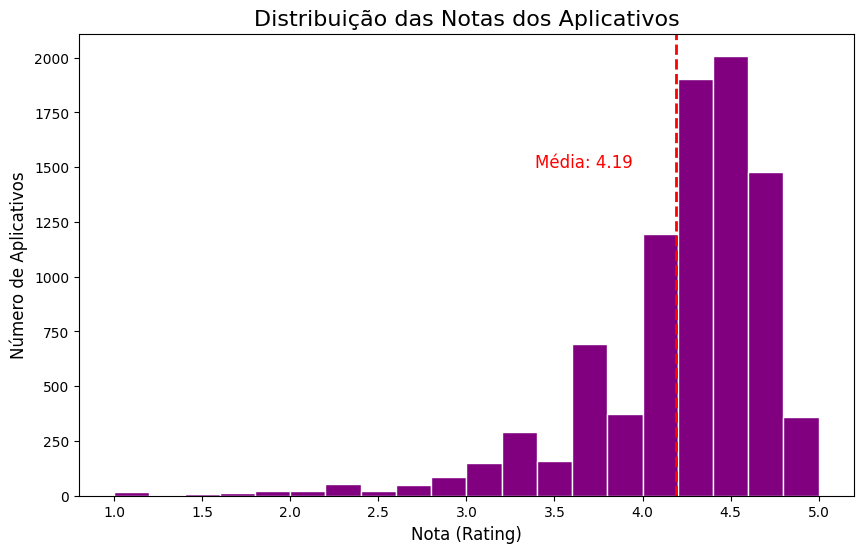

In [20]:
# Tarefa 7 (Cálculo em formato de valor)
# Primeiro, vamos remover valores nulos da coluna 'Rating' para não dar erro no cálculo
df_ratings = df.dropna(subset=['Rating'])
media_geral_rating = df_ratings['Rating'].mean()

print("--- Cálculo 1: Média Geral de Notas ---")
print(f"A média de nota (rating) de todos os aplicativos é: {media_geral_rating:.2f}")


# Tarefa 8 (Gráfico 1: Histograma)
print("\n--- Gráfico 1: Histograma da Distribuição de Notas ---")
plt.figure(figsize=(10, 6))

# Criar o histograma da coluna 'Rating'
plt.hist(df_ratings['Rating'], bins=20, color='purple', edgecolor='white')

# Adicionar uma linha vertical para marcar a média
plt.axvline(media_geral_rating, color='red', linestyle='dashed', linewidth=2)

# Adicionar um texto para a linha da média
plt.text(media_geral_rating - 0.8, 1500, f'Média: {media_geral_rating:.2f}', color = 'red', fontsize=12)

plt.title('Distribuição das Notas dos Aplicativos', fontsize=16)
plt.xlabel('Nota (Rating)', fontsize=12)
plt.ylabel('Número de Aplicativos', fontsize=12)
plt.show()

--- Cálculo 2: Top 10 Categorias por Média de Nota ---
Category
EVENTS                 4.435556
EDUCATION              4.375969
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333871
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
Name: Rating, dtype: float64

--- Gráfico 2: Gráfico de Barras Horizontais ---


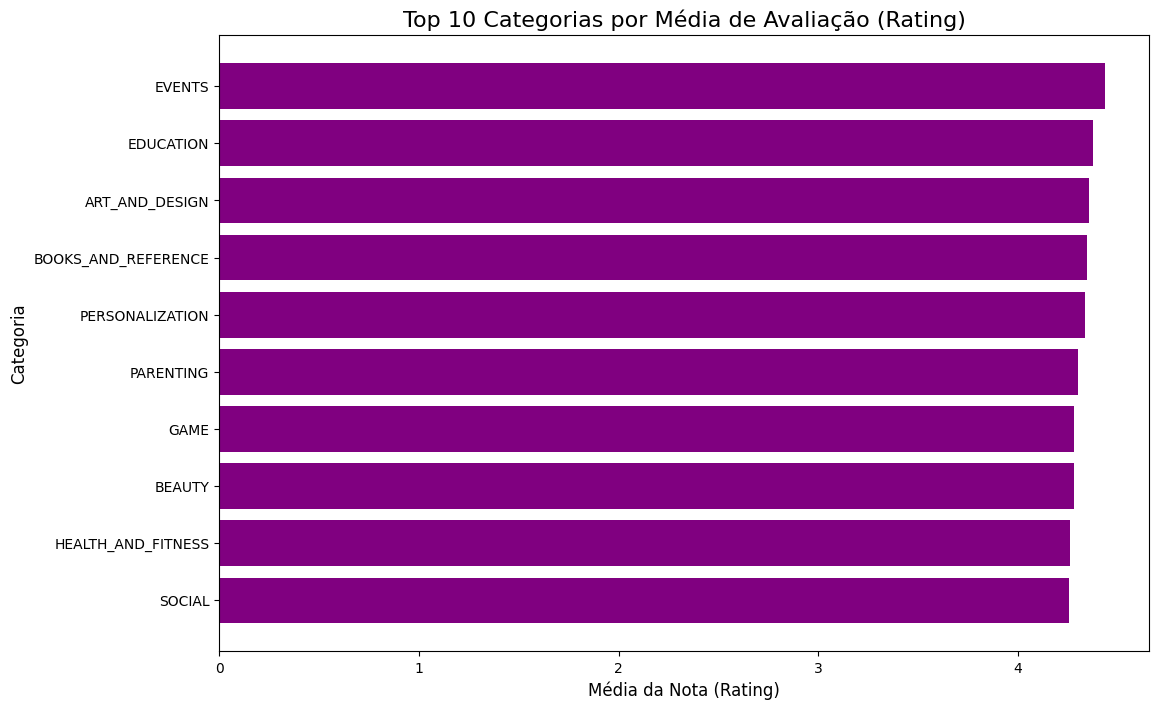

In [19]:
# Tarefa 7 (Cálculo em formato de lista)
# Agrupar por categoria e calcular a média de 'Rating' de cada uma
media_rating_por_categoria = df_ratings.groupby('Category')['Rating'].mean()

# Ordenar os valores e pegar o top 10
top_10_categorias_por_rating = media_rating_por_categoria.sort_values(ascending=False).head(10)

print("--- Cálculo 2: Top 10 Categorias por Média de Nota ---")
print(top_10_categorias_por_rating)


# Tarefa 8 (Gráfico 2: Barras Horizontais)
print("\n--- Gráfico 2: Gráfico de Barras Horizontais ---")
plt.figure(figsize=(12, 8))

# Criar o gráfico de barras horizontais
# Invertemos os eixos para que as categorias fiquem no eixo Y
plt.barh(top_10_categorias_por_rating.index, top_10_categorias_por_rating.values, color='purple')

# Inverter a ordem do eixo Y para que a maior média fique no topo
plt.gca().invert_yaxis()

plt.title('Top 10 Categorias por Média de Avaliação (Rating)', fontsize=16)
plt.xlabel('Média da Nota (Rating)', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.show()